In [1]:
from clarifai.rest import ClarifaiApp
import scipy.misc

In [2]:
app = ClarifaiApp(api_key='b9b1dc3d4d2f45f5a07978674eab670e')

('Hey! Clarifai Python Client v%s upgrade available.', u'2.0.32')


In [3]:
from clarifai.rest import Image as ClImage
model = app.models.get('moderation')
image = ClImage(url='https://samples.clarifai.com/nsfw.jpg')
model.predict([image])

{u'outputs': [{u'created_at': u'2017-09-01T04:05:18.877019874Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.8826475},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.15422383},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.009157375},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.00013227394},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 8.9625435e-05}]},
   u'id': u'd012bd61aa4946cb8682b4ce000183b1',
   u'input': {u'data': {u'image': {u'url': u'https://samples.clarifai.com/nsfw.jpg'}},
    u'id': u'e009e9582fc6404a9838e2aff13db02b'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T19:20:38.733764Z',
    u'display_name': u'Moderation',
    u'id': u'd16f390eb32cad478c7ae150069bd2c6',
   

In [4]:
image=ClImage(file_obj=open('clarifai_images/nsfw-002.jpg','rb'))

In [5]:
model.predict([image])

{u'outputs': [{u'created_at': u'2017-09-01T04:05:22.948339920Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.79345274},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.20213273},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.08043951},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.0048384983},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.0032322567}]},
   u'id': u'ff94c829f7de405e9d0821872f24a24e',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/bfba13d6e2ca4e31bea9b7544a204806'}},
    u'id': u'fe574192c3d94fe2913bf51561560d7b'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [8]:
img=mpimg.imread('clarifai_images/drugs_small.jpg')

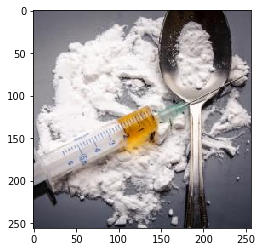

In [9]:
imgplot = plt.imshow(img)

In [10]:
random_perturb = np.random.randn(*img.shape)

In [11]:
img_mod = np.clip(img + 32*np.sign(random_perturb),0,255)

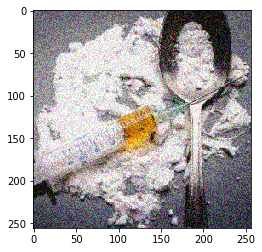

In [12]:
plt.imshow(img_mod/255)

In [17]:
# small_image=scipy.misc.imresize(img,25)
plt.imsave('clarifai_images/drugs_small_rand.jpg',img_mod/255)

In [18]:
drugs_rand = plt.imread('clarifai_images/drugs_small_rand.jpg')

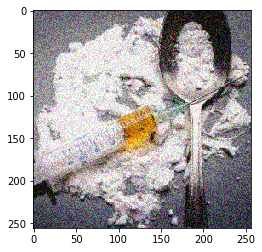

In [19]:
plt.imshow(drugs_rand)

In [22]:
drugs_image=ClImage(file_obj=open('clarifai_images/drugs_small_adv_32.jpg','rb'))
model.predict([drugs_image])

{u'outputs': [{u'created_at': u'2017-09-01T04:10:46.696296326Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.9619076},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.060435392},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.0064264997},
     {u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.0009296731},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.00066968304}]},
   u'id': u'ae050d7415a64d57a8bce66e084e0b62',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/bd97b1fc31014efa9d0d48269a86b6ab'}},
    u'id': u'abff8ee1245443a98bdc7bdae339af55'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-

In [16]:
small_img_noisy=scipy.misc.imresize(img_mod,25)
plt.imsave('nsfw-002-small-noisy.jpg',small_img_noisy)

In [17]:
image_small_noisy=ClImage(file_obj=open('nsfw-002-small-noisy.jpg','rb'))
model.predict([image_small_noisy])

{u'outputs': [{u'created_at': u'2017-08-25T19:46:43.981645123Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.5171195},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.4364518},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.14942567},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.026378093},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.0044426946}]},
   u'id': u'fe1c6c65c34d49118fd280937bb8c8fe',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/e9128483173442c386f7d5c8738b421e'}},
    u'id': u'c1fc3a90481c48b7930b222b1d6e22f3'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T19:

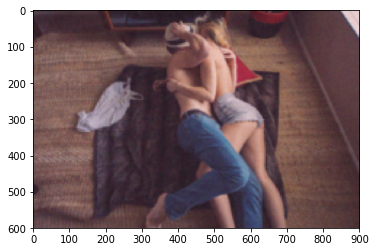

In [18]:
image_resized_noisy=scipy.misc.imresize(small_img_noisy,4.0)
plt.imshow(image_resized_noisy)
plt.imsave('nsfw-002-noisy-resized.jpg',image_resized_noisy)

In [19]:
image_noisy_resized=ClImage(file_obj=open('nsfw-002-noisy-resized.jpg','rb'))
model.predict([image_noisy_resized])

{u'outputs': [{u'created_at': u'2017-08-25T19:46:45.440888840Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.46132785},
     {u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.35957384},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.23185483},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.052640095},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.0035877335}]},
   u'id': u'a8495a1105bd4e0cb6298ebc67b0d51c',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/cb19168eb8e6498fbb09045206629ebc'}},
    u'id': u'a677ff9358434a79ad58929eebcfc0e8'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T1

In [20]:
drugs_small=ClImage(file_obj=open('clarifai_images/nsfw-002-noisy-resized.jpg','rb'))
model.predict([drugs_small])

{u'outputs': [{u'created_at': u'2017-08-25T19:46:46.354496860Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.51640487},
     {u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.35639647},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.18722147},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.034736287},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.003460959}]},
   u'id': u'd92c50cae9874a5fbdf924c18d1adb43',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/a60d0c0598f84b5b9af6edfb450ee546'}},
    u'id': u'a086f7d4e99c44ccb7ac949df3a3d873'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T19

In [7]:
def moderation_dict_reader(concepts_list, preds_array):
    preds_array[0]=filter(lambda concept: concept['name'] == 'safe', concepts_list)[0]['value']
    preds_array[1]=filter(lambda concept: concept['name'] == 'suggestive', concepts_list)[0]['value']
    preds_array[2]=filter(lambda concept: concept['name'] == 'explicit', concepts_list)[0]['value']
    preds_array[3]=filter(lambda concept: concept['name'] == 'drug', concepts_list)[0]['value']
    preds_array[4]=filter(lambda concept: concept['name'] == 'gore', concepts_list)[0]['value']
    return preds_array

In [8]:
def CW_est(x_plus_i, x_minus_i, curr_target, max_index):
    image_plus=ClImage(file_obj=open(x_plus_i,'rb'))
    pred_plus=np.zeros((5))
    pred_plus_dict = model.predict([image_plus])['outputs'][0]['data']['concepts']
    pred_plus = moderation_dict_reader(pred_plus_dict, pred_plus)
    logit_plus = np.log(pred_plus)
    logit_plus_t = logit_plus[curr_target]
    logit_plus_max = logit_plus[max_index]

    image_minus=ClImage(file_obj=open(x_minus_i,'rb'))
    pred_minus=np.zeros((5))
    pred_minus_dict = model.predict([image_minus])['outputs'][0]['data']['concepts']
    pred_minus = moderation_dict_reader(pred_minus_dict, pred_minus)
    logit_minus = np.log(pred_minus)
    logit_minus_t = logit_minus[curr_target]
    logit_minus_max = logit_minus[max_index]

    logit_t_grad_est = (logit_plus_t - logit_minus_t)/delta
    logit_max_grad_est = (logit_plus_max - logit_minus_max)/delta

    return logit_t_grad_est/2.0, logit_max_grad_est/2.0

In [9]:
def xent_est(x_plus_i, x_minus_i, curr_target):
    image_plus=ClImage(file_obj=open(x_plus_i,'rb'))
    pred_plus=np.zeros((5))
    pred_plus_dict = model.predict([image_plus])['outputs'][0]['data']['concepts']
    pred_plus = moderation_dict_reader(pred_plus_dict, pred_plus)
    pred_plus_t = pred_plus[curr_target]
    
    image_minus=ClImage(file_obj=open(x_minus_i,'rb'))
    pred_minus=np.zeros((5))
    pred_minus_dict = model.predict([image_minus])['outputs'][0]['data']['concepts']
    pred_minus = moderation_dict_reader(pred_minus_dict, pred_minus)
    pred_minus_t = pred_minus[curr_target]
    single_grad_est = (pred_plus_t - pred_minus_t)/delta
    print(single_grad_est)

    return single_grad_est/2.0

In [31]:
def pca_components(X, dim):
    X = X.reshape((1, dim))
    pca = PCA(n_components=dim)
    pca.fit(X)

    U = (pca.components_).T
#     U_norm = normalize(U, axis=0)
    print(U.shape)

    return U[:,:NUM_COMP]

In [29]:
def finite_diff_method(curr_sample, curr_target, p_t, max_index, U=None):
    grad_est = np.zeros((IMAGE_ROWS, IMAGE_COLS, NUM_CHANNELS))
    random_indices = np.random.permutation(dim)
    num_groups = dim / group_size
    if PCA_FLAG == True:
        num_groups = NUM_COMP
    print num_groups
    for j in range(num_groups):
        basis_vec = np.zeros((IMAGE_ROWS, IMAGE_COLS, NUM_CHANNELS))
        if PCA_FLAG == False:
            if j != num_groups-1:
                curr_indices = random_indices[j*group_size:(j+1)*group_size]
            elif j == num_groups-1:
                curr_indices = random_indices[j*group_size:]
            per_c_indices = curr_indices%(IMAGE_COLS*IMAGE_ROWS)
            channel = curr_indices/(IMAGE_COLS*IMAGE_ROWS)
            row = per_c_indices/IMAGE_COLS
            col = per_c_indices % IMAGE_COLS
            for i in range(len(curr_indices)):
                basis_vec[row[i], col[i], channel[i]] = 1.
        elif PCA_FLAG == True:
            basis_vec = U[:,j].reshape((IMAGE_ROWS, IMAGE_COLS, NUM_CHANNELS))
        image_plus_i = np.clip(curr_sample + delta * basis_vec, CLIP_MIN, CLIP_MAX)
        x_plus_i = 'clarifai_images/moderation_image_plus.jpg'
        plt.imsave(x_plus_i,image_plus_i/255)
        image_minus_i = np.clip(curr_sample - delta * basis_vec, CLIP_MIN, CLIP_MAX)
        x_minus_i = 'clarifai_images/moderation_image_minus.jpg'
        plt.imsave(x_minus_i,image_minus_i/255)
        
#         single_grad_est = xent_est(x_plus_i, x_minus_i, curr_target)
        logit_t_grad_est, logit_max_grad_est = CW_est(x_plus_i, x_minus_i, curr_target, max_index)
        single_grad_est = logit_t_grad_est - logit_max_grad_est
        print(single_grad_est)
        if PCA_FLAG == False:
            for i in range(len(curr_indices)):
                grad_est[row[i], col[i], channel[i]] = single_grad_est.reshape((1))
        elif PCA_FLAG == True:
            grad_est += basis_vec*single_grad_est
            
    # Getting gradient of the loss
#     loss_grad = -1.0 * grad_est/p_t
    loss_grad = grad_est

    return loss_grad

In [32]:
import time
from sklearn.decomposition import PCA
time1 = time.time()
success = 0
avg_l2_perturb = 0
curr_image='clarifai_images/drugs_small.jpg'
curr_sample = np.array(mpimg.imread(curr_image),dtype=float)
curr_sample=curr_sample[:,:,:3]

BATCH_SIZE=1
IMAGE_ROWS=curr_sample.shape[0]
IMAGE_COLS=curr_sample.shape[1]
NUM_CHANNELS=curr_sample.shape[2]
dim=IMAGE_ROWS*IMAGE_COLS*NUM_CHANNELS
delta=0.01
CLIP_MIN=0
CLIP_MAX=255
group_size=1000
eps=20
norm='linf'
PCA_FLAG=True

image_cl=ClImage(file_obj=open(curr_image,'rb'))

curr_prediction = np.zeros((5))
curr_predict_dict = model.predict([image_cl])['outputs'][0]['data']['concepts']
curr_prediction = moderation_dict_reader(curr_predict_dict, curr_prediction)

curr_target = 0
max_index = np.argmax(curr_prediction)

p_t = curr_prediction[curr_target]

if PCA_FLAG==True:
    NUM_COMP=200
    U = pca_components(curr_sample,dim)
    loss_grad = finite_diff_method(curr_sample,curr_target, p_t, max_index,U)
else:
    loss_grad = finite_diff_method(curr_sample,curr_target, p_t, max_index)
# np.save('loss_grad_drugs.npy',loss_grad)
# loss_grad = np.load('loss_grad_drugs.npy')

# Getting signed gradient of loss
if norm == 'linf':
    normed_loss_grad = np.sign(loss_grad)
elif norm == 'l2':
    grad_norm = np.linalg.norm(loss_grad.reshape(dim))
    normed_loss_grad = np.zeros_like(curr_sample)
    normed_loss_grad = loss_grad/grad_norm

# eps_mod = eps - args.alpha
image_adv = np.clip(curr_sample - eps * normed_loss_grad, CLIP_MIN, CLIP_MAX)
x_adv = 'clarifai_images/drugs_small_adv_'+str(eps)+'.jpg'
plt.imsave(x_adv,image_adv/255)

# Getting the norm of the perturbation
perturb_norm = np.linalg.norm((image_adv-curr_sample).reshape(dim))
perturb_norm_batch = np.mean(perturb_norm)
avg_l2_perturb += perturb_norm_batch

image_adv_cl=ClImage(file_obj=open(x_adv,'rb'))

adv_prediction = np.zeros((5))
adv_predict_dict = model.predict([image_adv_cl])['outputs'][0]['data']['concepts']
adv_prediction = moderation_dict_reader(adv_predict_dict, adv_prediction)
success += np.sum(np.argmax(adv_prediction) == curr_target)

success = 100.0 * float(success)

# success = 100.0 - success

time2 = time.time()
print('Average l2 perturbation: {}'.format(avg_l2_perturb))
print('Total time: {}'.format(time2-time1))

(196608, 1)
200
-0.00822530238924


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
curr_prediction

In [ ]:
adv_prediction

In [ ]:
p_t

In [ ]:
success

In [ ]:
perturb_norm

In [ ]:
curr_predict_dict

In [ ]:
adv_predict_dict

In [ ]:
small_adv=plt.imread('nsfw_image_adv.jpg')
image_resized_noisy=scipy.misc.imresize(small_adv,4.0)
plt.imshow(image_resized_noisy)
plt.imsave('nsfw-002-noisy-resized.jpg',image_resized_noisy)

In [ ]:
dim